In [1]:
import pymysql
import datetime
import time
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt

# import sys
# sys.path.append(r'C:\Users\10768\personal files\waiting_time\waiting_time_project\my_tools')
# import tools_for_os.for_df as ml_df
# import tools_for_os.for_file as ml_fl

import sys
sys.path.append(r'C:\Users\10768\personal files\waiting_time\waiting_time_project')
from data_process import get_apptointment_info, get_treat_info

==========================================================================
#### 这一部分的数据与处理和治疗时长预测的预处理相同
都需要将同一个appointment 里面的特征合并，同时将分类变量进行编码

In [2]:
# data_path = 'D:\\jupyter files\\data_waiting_time_project\\preprocess_data\\'
# pat_duration_LSTM_data_path = data_path + 'patient_duration_LSTM_data\\'

# ml_fl.create_folder(pat_duration_LSTM_data_path)

In [3]:
processed_appointment_data = get_apptointment_info()
print(f'process_appointment_data shap {processed_appointment_data.shape}')
processed_treatment_data = get_treat_info()
print(f'processed_treatment_data shap {processed_treatment_data.shape}')

WAITING TIME: 2020-08-13 17:14:56 [INFO] Get information about appointment!
WAITING TIME: 2020-08-13 17:14:56 [DEBUG] Get table of appointment!
WAITING TIME: 2020-08-13 17:15:42 [DEBUG] Get table of patient!
WAITING TIME: 2020-08-13 17:15:44 [DEBUG] Merge appointment and patient!
WAITING TIME: 2020-08-13 17:15:44 [DEBUG] Get table of patientdoctor!
WAITING TIME: 2020-08-13 17:15:47 [DEBUG] Merge patientdoctor!
WAITING TIME: 2020-08-13 17:15:47 [DEBUG] Get table of diagnosis!
WAITING TIME: 2020-08-13 17:15:48 [DEBUG] Get table of diagnosis!
WAITING TIME: 2020-08-13 17:15:48 [DEBUG] Merge diagnosis and diagnosistranslation!
WAITING TIME: 2020-08-13 17:15:48 [DEBUG] Get table of course!
WAITING TIME: 2020-08-13 17:15:50 [DEBUG] Get table of plan!
WAITING TIME: 2020-08-13 17:15:54 [DEBUG] Merge plan and course!
WAITING TIME: 2020-08-13 17:15:54 [DEBUG] Merge plan_course and appointment!
WAITING TIME: 2020-08-13 17:15:55 [DEBUG] Drop columns with same values!
WAITING TIME: 2020-08-13 17:15:

process_appointment_data shap (1047176, 21)


WAITING TIME: 2020-08-13 17:18:47 [DEBUG] Get table of radiationhstry!
WAITING TIME: 2020-08-13 17:20:06 [DEBUG] Merge radiation and radiationhstry!
WAITING TIME: 2020-08-13 17:20:06 [DEBUG] Merge plan!
WAITING TIME: 2020-08-13 17:20:11 [DEBUG] Get table of radiation!
WAITING TIME: 2020-08-13 17:20:13 [DEBUG] Get table of radiation!
WAITING TIME: 2020-08-13 17:20:13 [DEBUG] Merge course and patient
WAITING TIME: 2020-08-13 17:20:13 [DEBUG] Merge radiation and radiation!
WAITING TIME: 2020-08-13 17:20:14 [DEBUG] Drop columns with same values!
WAITING TIME: 2020-08-13 17:20:15 [DEBUG] Process treatment data!


processed_treatment_data shap (507863, 15)


In [4]:
def combine_mul_row_appt(data_part1):
    new_appt = pd.DataFrame({})

    print('Start cateorical features')
    print('\nStart PatientSerNum')
    new_appt['PatientSerNum'] = data_part1.groupby('AppointmentSerNum').PatientSerNum.apply(set)
    new_appt['PatientSerNum'] = new_appt['PatientSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start Sex')
    new_appt['Sex'] = data_part1.groupby('AppointmentSerNum').Sex.apply(set)
    new_appt['Sex'] = new_appt['Sex'].apply(lambda x: ml_df.get_list(x))

    print('Start DoctorSerNum')
    new_appt['DoctorSerNum'] = data_part1.groupby('AppointmentSerNum').DoctorSerNum.apply(set)
    new_appt['DoctorSerNum'] = new_appt['DoctorSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start date')
    new_appt['date'] = data_part1.groupby('AppointmentSerNum').date.apply(set)
    new_appt['date'] = new_appt['date'].apply(lambda x: ml_df.get_list(x))

    print('Start ScheduledStartTime')
    new_appt['ScheduledStartTime'] = data_part1.groupby('AppointmentSerNum').ScheduledStartTime.apply(set)
    new_appt['ScheduledStartTime'] = new_appt['ScheduledStartTime'].apply(lambda x: ml_df.get_list(x))

    print('Start ScheduledEndTime')
    new_appt['ScheduledEndTime'] = data_part1.groupby('AppointmentSerNum').ScheduledEndTime.apply(set)
    new_appt['ScheduledEndTime'] = new_appt['ScheduledEndTime'].apply(lambda x: ml_df.get_list(x))

    print('Start ActualStartDate')
    new_appt['ActualStartDate'] = data_part1.groupby('AppointmentSerNum').ActualStartDate.apply(set)
    new_appt['ActualStartDate'] = new_appt['ActualStartDate'].apply(lambda x: ml_df.get_list(x))

    print('Start ActualEndDate')
    new_appt['ActualEndDate'] = data_part1.groupby('AppointmentSerNum').ActualEndDate.apply(set)
    new_appt['ActualEndDate'] = new_appt['ActualEndDate'].apply(lambda x: ml_df.get_list(x))

    print('Start dxt_AliasName')
    new_appt['dxt_AliasName'] = data_part1.groupby('AppointmentSerNum').dxt_AliasName.apply(set)
    new_appt['dxt_AliasName'] = new_appt['dxt_AliasName'].apply(lambda x: ml_df.get_list(x))

    print('Start AliasSerNum')
    new_appt['AliasSerNum'] = data_part1.groupby('AppointmentSerNum').AliasSerNum.apply(set)
    new_appt['AliasSerNum'] = new_appt['AliasSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start CourseSerNum')
    new_appt['CourseSerNum'] = data_part1.groupby('AppointmentSerNum').CourseSerNum.apply(set)
    new_appt['CourseSerNum'] = new_appt['CourseSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start PlanSerNum')
    new_appt['PlanSerNum'] = data_part1.groupby('AppointmentSerNum').PlanSerNum.apply(set)
    new_appt['PlanSerNum'] = new_appt['PlanSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start TreatmentOrientation')
    new_appt['TreatmentOrientation'] = data_part1.groupby('AppointmentSerNum').TreatmentOrientation.apply(set)
    new_appt['TreatmentOrientation'] = new_appt['TreatmentOrientation'].apply(lambda x: ml_df.get_list(x))

    print('Start month')
    new_appt['month'] = data_part1.groupby('AppointmentSerNum').month.apply(set)
    new_appt['month'] = new_appt['month'].apply(lambda x: ml_df.get_list(x))

    print('Start week')
    new_appt['week'] = data_part1.groupby('AppointmentSerNum').week.apply(set)
    new_appt['week'] = new_appt['week'].apply(lambda x: ml_df.get_list(x))

    print('Start hour')
    new_appt['hour'] = data_part1.groupby('AppointmentSerNum').hour.apply(set)
    new_appt['hour'] = new_appt['hour'].apply(lambda x: ml_df.get_list(x))

    print('Start AppointmentSerNum')
    new_appt['AppointmentSerNum'] = new_appt.index.tolist()


    print('Start numberical features')
    print('\nStart age')
    new_appt['age'] = data_part1.groupby('AppointmentSerNum').age.mean()

    print('Start Scheduled_duration')
    new_appt['Scheduled_duration'] = data_part1.groupby('AppointmentSerNum').Scheduled_duration.mean()

    print('Start Actual_duration')
    new_appt['Actual_duration'] = data_part1.groupby('AppointmentSerNum').Actual_duration.mean()
    
    new_appt.reset_index(drop = True, inplace = True)
    
    return new_appt

In [5]:
def combine_mul_row_treat(data_part2):
    new_treat = pd.DataFrame({})

    print('Start categorical features')
    print('\nStart FractionNumber')
    new_treat['FractionNumber'] = data_part2.groupby(['PatientSerNum', 'date']).FractionNumber.apply(set)
    new_treat['FractionNumber'] = new_treat['FractionNumber'].apply(lambda x: ml_df.get_list(x))

    print('Start UserName')
    new_treat['UserName'] = data_part2.groupby(['PatientSerNum', 'date']).UserName.apply(set)
    new_treat['UserName'] = new_treat['UserName'].apply(lambda x: ml_df.get_list(x))

    print('Start RadiationSerNum')
    new_treat['RadiationSerNum'] = data_part2.groupby(['PatientSerNum', 'date']).RadiationSerNum.apply(set)
    new_treat['RadiationSerNum'] = new_treat['RadiationSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start RadiationId')
    new_treat['RadiationId'] = data_part2.groupby(['PatientSerNum', 'date']).RadiationId.apply(set)
    new_treat['RadiationId'] = new_treat['RadiationId'].apply(lambda x: ml_df.get_list(x))

    print('Start ResourceSerNum')
    new_treat['ResourceSerNum'] = data_part2.groupby(['PatientSerNum', 'date']).ResourceSerNum.apply(set)
    new_treat['ResourceSerNum'] = new_treat['ResourceSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start CourseId')
    new_treat['CourseId'] = data_part2.groupby(['PatientSerNum', 'date']).CourseId.apply(set)
    new_treat['CourseId'] = new_treat['CourseId'].apply(lambda x: ml_df.get_list(x))

    print('Start PatientSerNum')
    new_treat['PatientSerNum'] = new_treat.index.get_level_values(level = 0).tolist()

    print('Start date')
    new_treat['date'] = new_treat.index.get_level_values(level = 1).tolist()
    
    
    print('Start numberical features')
    print('\nStart ImagesTaken_total')
    new_treat['ImagesTaken_total'] = data_part2.groupby(['PatientSerNum', 'date']).ImagesTaken.sum()

    print('Start MU_total')
    new_treat['MU_total'] = data_part2.groupby(['PatientSerNum', 'date']).MU.sum()

    print('Start MUCoeff_total')
    new_treat['MUCoeff_total'] = data_part2.groupby(['PatientSerNum', 'date']).MUCoeff.sum()

    print('Start TreatmentTime_total')
    new_treat['TreatmentTime_total'] = data_part2.groupby(['PatientSerNum', 'date']).TreatmentTime.sum()
    
    new_treat.reset_index(drop = True, inplace = True)
    
    return new_treat

In [6]:
# 数字也能够正常处理，比如出现0，同样会正常处理，并不会认为0 是没有值
def one_hot_enc(feature, data):
    # one hot encoder
    one_hot_encoder = preprocessing.OneHotEncoder(handle_unknown = 'ignore', sparse = False)
    one_hot_encoder.fit(data[feature].values.reshape(-1, 1))
    return one_hot_encoder

In [7]:
feature_num = ['Scheduled_duration', 'Actual_duration',
               'age', 'TreatmentTime_total', 'ImagesTaken_total',
               'MU_total', 'MUCoeff_total']

# RadiationId
feature_cate = ['dxt_AliasName', 'Sex', 'AliasSerNum',
                'month', 'week', 'hour', 'DoctorSerNum', 
                'TreatmentOrientation', 'FractionNumber',
                'UserName', 'CourseId', 'ResourceSerNum']

In [9]:
# 缺失值填补
print('='*40)
print('Fill nan data')
print(f'processed_appointment_data shap {processed_appointment_data.shape}')
processed_appointment_data = ml_df.fill_nan(processed_appointment_data, feature_num, 'number')
processed_appointment_data = ml_df.fill_nan(processed_appointment_data, feature_cate, 'cate')
print(f'processed_appointment_data shap {processed_appointment_data.shape}')


print(f'processed_treatment_data shap {processed_treatment_data.shape}')
processed_treatment_data = ml_df.fill_nan(processed_treatment_data, feature_num, 'number')
processed_treatment_data = ml_df.fill_nan(processed_treatment_data, feature_cate, 'cate')
print(f'processed_treatment_data shap {processed_treatment_data.shape}')

Fill nan data
processed_appointment_data shap (1047176, 21)
processed_appointment_data shap (1047176, 21)
processed_treatment_data shap (507863, 15)
processed_treatment_data shap (507863, 15)


In [11]:
# 进行one hot 编码
print('='*40)
print('One Hot Encoding')
label_encoder_dxt_AliasName = one_hot_enc('dxt_AliasName', processed_appointment_data)
label_encoder_Sex = one_hot_enc('Sex', processed_appointment_data)
label_encoder_AliasSerNum = one_hot_enc('AliasSerNum', processed_appointment_data)
label_encoder_month = one_hot_enc('month', processed_appointment_data)
label_encoder_week = one_hot_enc('week', processed_appointment_data)
label_encoder_hour = one_hot_enc('hour', processed_appointment_data)
label_encoder_DoctorSerNum = one_hot_enc('DoctorSerNum', processed_appointment_data)
label_encoder_TreatmentOrientation = one_hot_enc('TreatmentOrientation', processed_appointment_data)
label_encoder_FractionNumber = one_hot_enc('FractionNumber', processed_appointment_data)
label_encoder_UserName = one_hot_enc('UserName', processed_appointment_data)
label_encoder_CourseId = one_hot_enc('CourseId', processed_appointment_data)
label_encoder_ResourceSerNum = one_hot_enc('ResourceSerNum', processed_appointment_data)

One Hot Encoding


NameError: name 'data_part1' is not defined

In [6]:
# feature_num = ['Scheduled_duration', 'Actual_duration',
#                'age', 'TreatmentTime_total', 'ImagesTaken_total',
#                'MU_total', 'MUCoeff_total']

# # RadiationId
# feature_cate = ['dxt_AliasName', 'Sex', 'AliasSerNum',
#                 'month', 'week', 'hour', 'DoctorSerNum', 
#                 'TreatmentOrientation', 'FractionNumber',
#                 'UserName', 'CourseId', 'ResourceSerNum']

# # 加载数据
# print('='*40)
# print('Load data_part')
# data_part1 = pd.read_csv(data_path + 'data_part1.csv', index_col = 0)
# data_part2 = pd.read_csv(data_path + 'data_part2.csv', index_col = 0)


# # 缺失值填补
# print('='*40)
# print('Fill nan data')
# data_part1 = ml_df.fill_nan(data_part1, feature_num, 'number')
# data_part1 = ml_df.fill_nan(data_part1, feature_cate, 'cate')

# data_part2 = ml_df.fill_nan(data_part2, feature_num, 'number')
# data_part2 = ml_df.fill_nan(data_part2, feature_cate, 'cate')


# 进行one hot 编码
print('='*40)
print('One Hot Encoding')
label_encoder_dxt_AliasName = one_hot_enc('dxt_AliasName', data_part1)
label_encoder_Sex = one_hot_enc('Sex', data_part1)
label_encoder_AliasSerNum = one_hot_enc('AliasSerNum', data_part1)
label_encoder_month = one_hot_enc('month', data_part1)
label_encoder_week = one_hot_enc('week', data_part1)
label_encoder_hour = one_hot_enc('hour', data_part1)
label_encoder_DoctorSerNum = one_hot_enc('DoctorSerNum', data_part1)
label_encoder_TreatmentOrientation = one_hot_enc('TreatmentOrientation', data_part1)
label_encoder_FractionNumber = one_hot_enc('FractionNumber', data_part2)
label_encoder_UserName = one_hot_enc('UserName', data_part2)
label_encoder_CourseId = one_hot_enc('CourseId', data_part2)
label_encoder_ResourceSerNum = one_hot_enc('ResourceSerNum', data_part2)


# 一个AppointmentSerNum 会出现多行，统计一下个数
print('='*40)
print('Count Appointment with multiple rows')
data_part1_grouped = data_part1.groupby('AppointmentSerNum')
count_appt = data_part1_grouped.count()
appt_one_list = count_appt[count_appt.Sex == 1].index.tolist()
appt_more_list = count_appt[count_appt.Sex > 1].index.tolist()
print(f'{len(appt_one_list)} with one appointment')
print(f'{len(appt_more_list)} with more appointment')


# 将相同的AppointmentSerNum 的信息进行合并
print('='*40)
print('Combine Appointment with multiple rows')
new_appt = combine_mul_row_appt(data_part1)
print(f'The shape of new_appt is {new_appt.shape}')
new_treat = combine_mul_row_treat(data_part2)
print(f'The shape of new_treat is {new_treat.shape}')


# 将appt 和treat 信息进行合并，得到DATA
print('='*40)
print('Merge data_appt and data_treat')
DATA = pd.merge(new_appt, new_treat, on = ['PatientSerNum', 'date'], how = 'inner')
DATA.sort_values(by = ['PatientSerNum', 'AppointmentSerNum', 'ScheduledStartTime'], inplace = True)
print(f'The shape of data is {DATA.shape}')

# 筛选后的DATA
print('='*40)
print('Filter data')
DATA_ = DATA[(DATA.Actual_duration >= 10) &
             (DATA.Actual_duration <= 60)]
print(f'The shape of data is {DATA_.shape}')


# 筛选后的DATA
print('='*40)
print('Get room information')
sql_re_appt = """SELECT * FROM resourceappointment"""
data_re_appt = ml_df.get_df_from_sql(sql_re_appt)
print(f'\nThe shape of data_re_appt {data_re_appt.shape}')

data_room = data_re_appt.rename(columns = {'ResourceSerNum': 'room'}, inplace = False)
data_room = data_room[['AppointmentSerNum', 'room']]
data_room.drop_duplicates(inplace = True)
print(f'The shape of data_room {data_room.shape}')

DATA_ = pd.merge(DATA_, data_room, on = 'AppointmentSerNum', how = 'left')
print(f'The shape of data {DATA_.shape}')

# 还可以增加AliasExpressionSerNum

Load data_part
Fill nan data
One Hot Encoding
Count Appointment with multiple rows
69142 with one appointment
251892 with more appointment
Combine Appointment with multiple rows
Start cateorical features

Start PatientSerNum
Start Sex
Start DoctorSerNum
Start date
Start ScheduledStartTime
Start ScheduledEndTime
Start ActualStartDate
Start ActualEndDate
Start dxt_AliasName
Start AliasSerNum
Start CourseSerNum
Start PlanSerNum
Start TreatmentOrientation
Start month
Start week
Start hour
Start AppointmentSerNum
Start numberical features

Start age
Start Scheduled_duration
Start Actual_duration
The shape of new_appt is (321034, 20)
Start categorical features

Start FractionNumber
Start UserName
Start RadiationSerNum
Start RadiationId
Start ResourceSerNum
Start CourseId
Start PatientSerNum
Start date
Start numberical features

Start ImagesTaken_total
Start MU_total
Start MUCoeff_total
Start TreatmentTime_total
The shape of new_treat is (142974, 12)
Merge data_appt and data_treat
The shape o

======================================================================================
# 构建room 的样本

In [8]:
def get_room_last_future_patient(room_number, room_feature):
    room = room_info_grouped.get_group(room_number)
    
    room.sort_values(by = 'ScheduledStartTime', inplace = True)
    room['order'] = [i+1 for i in range(room.shape[0])]
    
    room.sort_values(by = 'ActualStartDate', inplace = True)
    room.reset_index(drop = True, inplace = True)
    
    # 去掉最后一位患者的信息，构成上一位患者的DataFrame
    room_last = room.copy()
    room_last.drop(labels = [room_last.index[-1]], axis = 0, inplace = True)
    room_last.columns = ['last_' + col for col in room_last.columns]
    room_last.reset_index(drop = True, inplace = True)
    
    # 去掉第一位患者的信息，构成当前患者的DataFrame
    room.drop(labels = [room.index[0]], axis = 0, inplace = True)
    room.reset_index(drop = True, inplace = True)
    
    # 横向拼接数据
    room = pd.concat([room_last, room], axis = 1)
    
    # 计算实际转换时长，也就是得到标签
    room['Transfer_duration'] = room.apply(lambda x: 
                                           ml_df.cal_time_inv(x.last_ActualEndDate, x.ActualStartDate) / 60, axis = 1)
    
    # 因为可能有缺失的数据，因此把这个作为一个特征
    room['Interval_number'] = room.apply(lambda x: int(x.Transfer_duration / 15), axis = 1)
    
    room = room[room_feature]
    
    return room

In [42]:
a = room_info_grouped.get_group(room_seq[2])
a.sort_values(by = 'ScheduledStartTime', inplace = True)
a

,PatientSerNum,Sex,DoctorSerNum,date,ScheduledStartTime,ScheduledEndTime,ActualStartDate,ActualEndDate,dxt_AliasName,AliasSerNum,...,UserName,RadiationSerNum,RadiationId,ResourceSerNum,CourseId,ImagesTaken_total,MU_total,MUCoeff_total,TreatmentTime_total,room
20580,37978,Female,4561.0,2015--06--16,2015-06-16 08:15:00,2015-06-16 08:30:00,2015-06-16 08:21:00,2015-06-16 08:45:00,CNS,23,...,sleichen,"[434613, 434614]","[1.1ARC1, 1.2ARC2]",9,C1,0,417.0320,200.0000,1.184166,175.0
24727,38630,Female,4561.0,2015--06--16,2015-06-16 08:45:00,2015-06-16 09:00:00,2015-06-16 08:53:00,2015-06-16 09:13:00,CNS,23,...,ypoon,"[438250, 438251]","[1.1ARC1, 1.2ARC2]",9,C1,0,362.7270,200.0000,1.352000,175.0
23386,38449,Male,1109.0,2015--06--16,2015-06-16 09:45:00,2015-06-16 10:00:00,2015-06-16 09:14:00,2015-06-16 09:29:00,CNS,23,...,cmurphy,"[433396, 433397]","[1.1ARC1, 1.2ARC2]",9,C1,2,437.4570,200.0000,2.007340,175.0
25689,38741,Male,262.0,2015--06--16,2015-06-16 10:00:00,2015-06-16 10:15:00,2015-06-16 10:25:00,2015-06-16 10:40:00,LGI,23,...,cmurphy,"[436280, 436281]","[1.1 RT LAT, 1.2 LT LAT]",9,C1,2,445.3500,222.6690,0.742833,175.0
23611,38488,Female,5246.0,2015--06--16,2015-06-16 11:00:00,2015-06-16 11:15:00,2015-06-16 10:42:00,2015-06-16 10:54:00,Resp,23,...,cmurphy,"[436400, 436401, 436402, 436403]","[1.3 LAO065, 1.2 LPO105, 1.1 LPO165, 1.4 LAO015]",9,C1,0,317.1912,350.1094,0.530001,175.0
3777,20622,Male,272.0,2015--06--16,2015-06-16 11:45:00,2015-06-16 12:00:00,2015-06-16 11:07:00,2015-06-16 11:39:00,METS,31,...,sleichen,"[438801, 438802]","[1.2 ARC2, 1.1 ARC1]",9,C5,2,1450.1820,200.0000,2.423330,175.0
2879,16531,Male,747.0,2015--06--16,2015-06-16 12:15:00,2015-06-16 12:30:00,2015-06-16 11:59:00,2015-06-16 12:15:00,Prostate,23,...,jstachura,"[439185, 439186]","[1.1ARC1, 1.2ARC2]",9,C1,6,373.3080,200.0000,2.021500,175.0
211,1700,Male,4561.0,2015--06--16,2015-06-16 12:45:00,2015-06-16 13:00:00,2015-06-16 12:17:00,2015-06-16 12:37:00,HN,23,...,jstachura,"[434112, 434113]","[1.1ARC1, 1.2ARC2]",9,C1,0,807.4760,200.0000,2.011330,175.0
24774,38636,Male,747.0,2015--06--16,2015-06-16 12:45:00,2015-06-16 13:00:00,2015-06-16 11:45:00,2015-06-16 11:58:00,GU except prostate,23,...,jstachura,"[437818, 437819]","[1.2 ARC2, 1.1 ARC1]",9,C1,4,523.7440,200.0000,1.352166,175.0
25693,38743,Male,747.0,2015--06--16,2015-06-16 13:00:00,2015-06-16 13:15:00,2015-06-16 12:40:00,2015-06-16 12:56:00,Sarcoma,23,...,cmurphy,"[438820, 438821]","[1.2 ARC2, 1.1 ARC1]",9,C1,4,390.3090,200.0000,1.086500,175.0


In [9]:
room_info_grouped = DATA_.groupby(['room', 'date'])

room_count = room_info_grouped.count()
room_seq = room_count[room_count.PatientSerNum > 1].index.tolist()
room_one = room_count[room_count.PatientSerNum == 1].index.tolist()
print(f'room_seq {len(room_seq)}')
print(f'room_one {len(room_one)}')

room_seq 6733
room_one 540


In [10]:
# 形成专门针对room 的特征
room_feature = feature_num + feature_cate
last_room_feature = ['last_' + col for col in room_feature]
room_feature = room_feature + last_room_feature + ['last_order', 'order', 'Interval_number', 'Transfer_duration']


# 形成专门针对room 的DataFrame
print('='*40)
print('Get DataFrame for room')
room_sample_all = pd.DataFrame({})
for i in range(len(room_seq)):
    room_number = room_seq[i]
    room = get_room_last_future_patient(room_number, room_feature = room_feature)
    room_sample_all = pd.concat([room_sample_all, room], axis = 0)
    
# a[['last_ScheduledStartTime', 'last_ActualEndDate', 'ScheduledStartTime', 'ActualStartDate', 'last_order', 'order']]

Get DataFrame for room


In [11]:
# last_Actual_duration 性质很特殊

# Actual_duration, last_month, last_week, last_ResourceSerNum


keep_feature_num = ['Scheduled_duration', 'age', 'TreatmentTime_total',
                    'ImagesTaken_total', 'MU_total', 'MUCoeff_total', 'order',
                    
                    'last_Scheduled_duration', 'last_age', 'last_TreatmentTime_total', 
                    'last_ImagesTaken_total', 'last_MU_total', 'last_MUCoeff_total', 'last_order',
                    
                    'Interval_number', 'Transfer_duration']


keep_feature_cate = ['dxt_AliasName', 'Sex', 'AliasSerNum', 'hour', 'DoctorSerNum',
                     'TreatmentOrientation', 'FractionNumber', 'UserName', 'CourseId',
                     
                     'last_dxt_AliasName', 'last_Sex', 'last_AliasSerNum', 'last_hour', 'last_DoctorSerNum',
                     'last_TreatmentOrientation', 'last_FractionNumber', 'last_UserName', 'last_CourseId',
                     
                     'ResourceSerNum', 'month', 'week']

room_sample_all = room_sample_all[keep_feature_num + keep_feature_cate]
room_sample_all = room_sample_all.sample(frac = 1, random_state = 1)

In [15]:
room_sample_all.shape

(136601, 37)

In [26]:
room_sample_all['Transfer_duration']

Index(['Scheduled_duration', 'age', 'TreatmentTime_total', 'ImagesTaken_total',
       'MU_total', 'MUCoeff_total', 'order', 'last_Scheduled_duration',
       'last_age', 'last_TreatmentTime_total', 'last_ImagesTaken_total',
       'last_MU_total', 'last_MUCoeff_total', 'last_order', 'Interval_number',
       'Transfer_duration', 'dxt_AliasName', 'Sex', 'AliasSerNum', 'hour',
       'DoctorSerNum', 'TreatmentOrientation', 'FractionNumber', 'UserName',
       'CourseId', 'last_dxt_AliasName', 'last_Sex', 'last_AliasSerNum',
       'last_hour', 'last_DoctorSerNum', 'last_TreatmentOrientation',
       'last_FractionNumber', 'last_UserName', 'last_CourseId',
       'ResourceSerNum', 'month', 'week'],
      dtype='object')

#### 转换时长的分布

In [27]:
plan_trans = room_sample_all.copy()

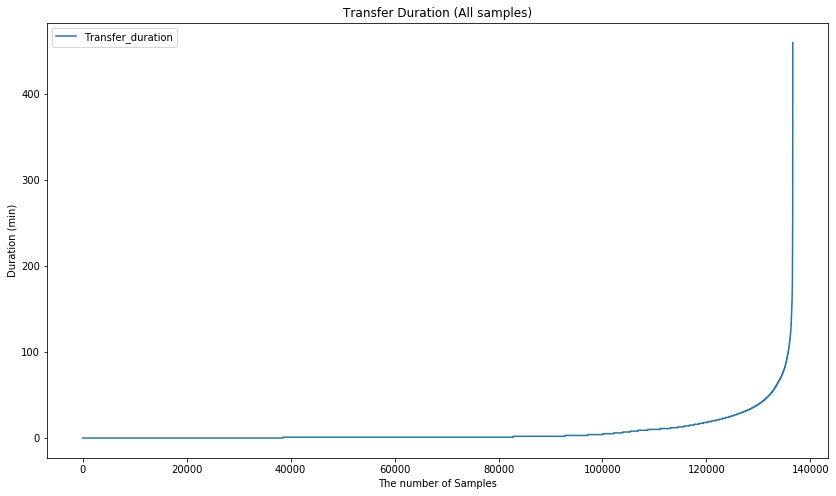

In [30]:
fig = plt.figure(figsize = (14, 8))
ax = plt.subplot(111)
x = range(len(plan_trans['Transfer_duration']))
y = plan_trans.Transfer_duration.tolist()
y.sort()

ax.plot(x, y, label = 'Transfer_duration')
ax.set_xlabel('The number of Samples')
ax.set_ylabel('Duration (min)')
ax.set_title('Transfer Duration (All samples)')
ax.legend()
plt.show()

#### 筛选出计划的患者序列，顺序没有发生变化的样本，也就是没有发生插队情况的样本

In [43]:
print(f'The number of all samples {plan_trans.shape}')

plan_trans['norm'] = plan_trans.order - plan_trans.last_order
plan_norm = plan_trans[plan_trans.norm == 1]
print(f'The number of samples order normal {plan_norm.shape}')

The number of all samples (136601, 38)
The number of samples order normal (47655, 38)


In [53]:
# 人工预测的基准
# 目前医院设置转换时长全部认为是0
# 全部样本，也就是包括了“插队”的情况
print(f'MAE all samples  {plan_trans.Transfer_duration.mean()}')

# 只包括本身就是相邻的两位患者的数据
print(f'MAE samples order normal {plan_norm.Transfer_duration.mean()}')

MAE all samples  7.461878024319002
MAE samples order normal 8.249354737173434


In [45]:

plan_norm.Transfer_duration.mean()

8.249354737173434

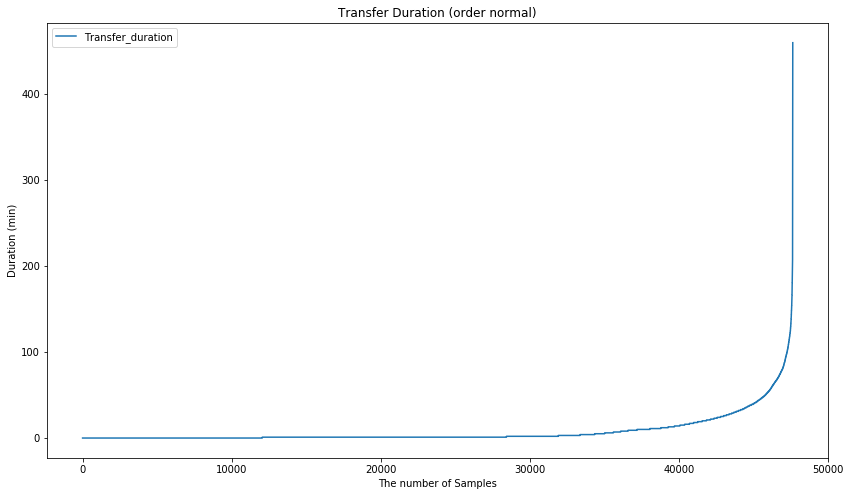

In [46]:
fig = plt.figure(figsize = (14, 8))
ax = plt.subplot(111)
x = range(len(plan_norm['Transfer_duration']))
y = plan_norm.Transfer_duration.tolist()
y.sort()

ax.plot(x, y, label = 'Transfer_duration')
ax.set_xlabel('The number of Samples')
ax.set_ylabel('Duration (min)')
ax.set_title('Transfer Duration (order normal)')
ax.legend()
plt.show()

======================================================================================
# 构建训练数据
因为有的特征存在多个取值，因此需要进行one hot 编码

In [12]:
def MAE(pred_y, test_y):
    mae = sum(np.abs((pred_y - test_y))) / len(pred_y)
    return mae

In [13]:
def RMSE(pred_y, test_y):
    sq = sum((pred_y - test_y)**2) / len(pred_y)
#     sq = sum((pred_y - np.array(test_y.Actual_duration.tolist()))**2) / len(pred_y)
    rmse = np.sqrt(sq)
    return rmse

In [16]:
def generate_sample(room_sample_all, keep_feature_num = keep_feature_num):
    
    # 对分类变量进行one-hot encoding处理
    encode_cate = pd.DataFrame({})

    encode_cate['last_dxt_AliasName'] = room_sample_all['last_dxt_AliasName'].apply(
        lambda x: sum(label_encoder_dxt_AliasName.transform(np.array(x).reshape(-1,1))))
    train_x = np.vstack(encode_cate.last_dxt_AliasName.tolist())
    
    encode_cate['dxt_AliasName'] = room_sample_all['dxt_AliasName'].apply(
        lambda x: sum(label_encoder_dxt_AliasName.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.dxt_AliasName.tolist())))
    
    encode_cate['last_Sex'] = room_sample_all['last_Sex'].apply(
        lambda x: sum(label_encoder_Sex.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.last_Sex.tolist())))
    
    encode_cate['Sex'] = room_sample_all['Sex'].apply(
        lambda x: sum(label_encoder_Sex.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.Sex.tolist())))

    encode_cate['last_AliasSerNum'] = room_sample_all['last_AliasSerNum'].apply(
        lambda x: sum(label_encoder_AliasSerNum.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.last_AliasSerNum.tolist())))
    
    encode_cate['AliasSerNum'] = room_sample_all['AliasSerNum'].apply(
        lambda x: sum(label_encoder_AliasSerNum.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.AliasSerNum.tolist())))
    
    encode_cate['last_hour'] = room_sample_all['last_hour'].apply(
        lambda x: sum(label_encoder_hour.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.last_hour.tolist())))
    
    encode_cate['hour'] = room_sample_all['hour'].apply(
        lambda x: sum(label_encoder_hour.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.hour.tolist())))

    
    encode_cate['last_DoctorSerNum'] = room_sample_all['last_DoctorSerNum'].apply(
        lambda x: sum(label_encoder_DoctorSerNum.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.last_DoctorSerNum.tolist())))

    encode_cate['DoctorSerNum'] = room_sample_all['DoctorSerNum'].apply(
        lambda x: sum(label_encoder_DoctorSerNum.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.DoctorSerNum.tolist())))
    
    encode_cate['last_TreatmentOrientation'] = room_sample_all['last_TreatmentOrientation'].apply(
        lambda x: sum(label_encoder_TreatmentOrientation.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.last_TreatmentOrientation.tolist())))

    encode_cate['TreatmentOrientation'] = room_sample_all['TreatmentOrientation'].apply(
        lambda x: sum(label_encoder_TreatmentOrientation.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.TreatmentOrientation.tolist())))
    
    encode_cate['last_FractionNumber'] = room_sample_all['last_FractionNumber'].apply(
        lambda x: sum(label_encoder_FractionNumber.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.last_FractionNumber.tolist())))
    
    encode_cate['FractionNumber'] = room_sample_all['FractionNumber'].apply(
        lambda x: sum(label_encoder_FractionNumber.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.FractionNumber.tolist())))

    encode_cate['last_UserName'] = room_sample_all['last_UserName'].apply(
        lambda x: sum(label_encoder_UserName.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.last_UserName.tolist())))

    encode_cate['UserName'] = room_sample_all['UserName'].apply(
        lambda x: sum(label_encoder_UserName.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.UserName.tolist())))
    
    encode_cate['last_CourseId'] = room_sample_all['last_CourseId'].apply(
        lambda x: sum(label_encoder_CourseId.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.last_CourseId.tolist())))

    encode_cate['CourseId'] = room_sample_all['CourseId'].apply(
        lambda x: sum(label_encoder_CourseId.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.CourseId.tolist())))
    
    
    encode_cate['ResourceSerNum'] = room_sample_all['ResourceSerNum'].apply(
        lambda x: sum(label_encoder_ResourceSerNum.transform(np.array(str(x)).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.ResourceSerNum.tolist())))
    
    encode_cate['month'] = room_sample_all['month'].apply(
        lambda x: sum(label_encoder_month.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.month.tolist())))

    encode_cate['week'] = room_sample_all['week'].apply(
        lambda x: sum(label_encoder_week.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.week.tolist())))
    
    
    # encode_cate['AliasExpressionSerNum'] = room['AliasExpressionSerNum'].apply(
    #    lambda x: sum(label_encoder_AliasExpressionSerNum.transform(np.array(x).reshape(-1,1))))
    # train_x = np.hstack((train_x, np.vstack(encode_cate.AliasExpressionSerNum.tolist())))
    
    
    # 将数值变量和非数值变量进行合并
    train_num = room_sample_all[keep_feature_num]
    train_num.drop('Transfer_duration', axis = 1, inplace = True)
    train_x = np.hstack((train_x, train_num))
    
    train_y = room_sample_all[['Transfer_duration']]
    
    return train_x, train_y

In [17]:
X, Y = generate_sample(room_sample_all, keep_feature_num = keep_feature_num)

In [18]:
train_x = X[: int(X.shape[0] * 0.9)]
train_y = Y[: int(X.shape[0] * 0.9)]
print(f'The shape of train_x is {train_x.shape}')

test_x = X[int(X.shape[0] * 0.9): ]
test_y = Y[int(X.shape[0] * 0.9): ]
print(f'The shape of test_x is {test_x.shape}')

The shape of train_x is (122940, 845)
The shape of test_x is (13661, 845)


In [19]:
# 创建模型，训练模型
print('='*40)
print('Train model')
gbm_room = lgb.LGBMRegressor(objective='mae', num_leaves=31, learning_rate=0.1,
                             n_estimators = 20000)#num_leaves=31

gbm_room.fit(
    train_x[: int(train_x.shape[0] * 0.9)], train_y[: int(train_y.shape[0] * 0.9)],
    eval_set=[(train_x[int(train_x.shape[0] * 0.9): ], train_y[int(train_y.shape[0] * 0.9): ])],
    eval_metric='mae',
    early_stopping_rounds=100,
    
)

# verbose=200

Train model
[1]	valid_0's l1: 6.41539
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 6.05401
[3]	valid_0's l1: 5.72877
[4]	valid_0's l1: 5.43606
[5]	valid_0's l1: 5.17262
[6]	valid_0's l1: 4.93552
[7]	valid_0's l1: 4.73063
[8]	valid_0's l1: 4.47903
[9]	valid_0's l1: 4.25742
[10]	valid_0's l1: 4.05878
[11]	valid_0's l1: 3.88388
[12]	valid_0's l1: 3.72646
[13]	valid_0's l1: 3.59069
[14]	valid_0's l1: 3.44258
[15]	valid_0's l1: 3.31041
[16]	valid_0's l1: 3.19265
[17]	valid_0's l1: 3.0895
[18]	valid_0's l1: 2.99815
[19]	valid_0's l1: 2.90994
[20]	valid_0's l1: 2.8316
[21]	valid_0's l1: 2.76151
[22]	valid_0's l1: 2.699
[23]	valid_0's l1: 2.64412
[24]	valid_0's l1: 2.59965
[25]	valid_0's l1: 2.54734
[26]	valid_0's l1: 2.50087
[27]	valid_0's l1: 2.45905
[28]	valid_0's l1: 2.42173
[29]	valid_0's l1: 2.38946
[30]	valid_0's l1: 2.35749
[31]	valid_0's l1: 2.32894
[32]	valid_0's l1: 2.30388
[33]	valid_0's l1: 2.28135
[34]	valid_0's l1: 2.26161
[35]	valid_0's l1: 2.

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20000, n_jobs=-1, num_leaves=31, objective='mae',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [21]:
# 测试
pred_y = gbm_room.predict(test_x, num_iteration = gbm_room.best_iteration_)

mae = MAE(pred_y, np.array(test_y.Transfer_duration.tolist()))
print(mae)

2.022261725960642


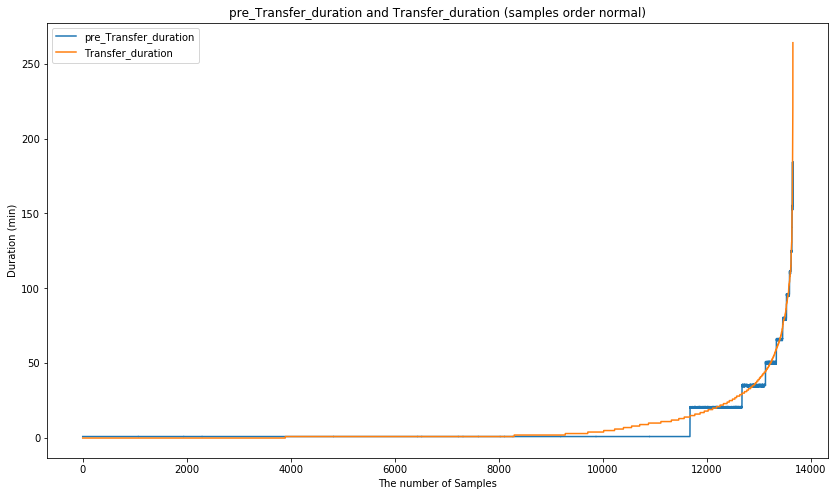

In [50]:
trans_pred_act = pd.DataFrame({'pre_Transfer_duration': pred_y,
                               'Transfer_duration': test_y.Transfer_duration.tolist()})
trans_pred_act.sort_values(by = ['Transfer_duration'], inplace = True)

fig = plt.figure(figsize = (14, 8))
ax = plt.subplot(111)
x = range(trans_pred_act.shape[0])
y1 = trans_pred_act.pre_Transfer_duration.tolist()
y2 = trans_pred_act.Transfer_duration.tolist()
ax.plot(x, y1, label = 'pre_Transfer_duration')
ax.plot(x, y2, label = 'Transfer_duration')

ax.set_xlabel('The number of Samples')
ax.set_ylabel('Duration (min)')
ax.set_title('pre_Transfer_duration and Transfer_duration (samples order normal)')
ax.legend()
plt.show()

In [ ]:
_